# Netflix Content Analysis PACE Workflow Notebook 

---

## 🟥 P: PLAN

### 1. Business Problem
Netflix releases a large library of movies and TV shows. This project explores:
- What type of content Netflix releases the most
- Genre distribution
- Country contribution
- Trends over time

### 2. Stakeholders
- Data analysts and students
- Researchers studying streaming patterns

### 3. Dataset
File: `netflix_titles.csv`

### 4. Scope
- Basic cleaning
- EDA
- Outlier checks
- Visualization insights

---


## 🟧 A: ANALYZE

### 1. Import & Load Data


### 2. Dataset Overview
- Dataset info
- Summary statistics
- Missing values

### 3. Data Cleaning Plan
- Handle duplicates
- Convert `date_added`
- Handle missing values
- Extract numeric durations

### 4. Outlier Detection Plan
- Movie duration outliers
- TV show season outliers

---


### Import Libraries

In [41]:
# === Setup: load libs and data (run once) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style("whitegrid")
%matplotlib inline

# Load data (change path if needed)
df = pd.read_csv("netflix_titles.csv")

# Prepare columns used later
df['duration'] = df['duration'].astype(str)
df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['seasons'] = df.apply(lambda x: float(x['duration'].split()[0]) if x['type']=='TV Show' else np.nan, axis=1)
movies = df[df['type']=='Movie'].copy()
tv = df[df['type']=='TV Show'].copy()


### Load dataset

In [3]:
# Load dataset
df = pd.read_csv('netflix_titles.csv')


# Examine data, summary info, and descriptive stats

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Get number of rows and columns
df.shape

(8807, 12)

In [6]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Generate basic descriptive stats
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [8]:
# Check for missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Drop rows with missing values
df = df.dropna(axis=0)

In [10]:
# Check how many rows remain after dropna
print("SHAPE after dropna:", df.shape)


SHAPE after dropna: (5332, 12)


In [11]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

### There are no duplicate in the data.

### Extract numeric durations for movies and TV shows so the dataset is ready for outlier checks.

In [12]:
# --- Duration Extraction for Outlier Prep ---

# 1) Movie durations (convert "90 min" → 90)
df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)

# 2) Identify TV Shows and extract number of seasons
df['seasons'] = df.apply(
    lambda x: float(x['duration'].split()[0]) if x['type'] == 'TV Show' else None,
    axis=1
)

# Preview important columns
print(df[['type','duration','duration_minutes','seasons']].head())
print("\nMissing in duration_minutes:", df['duration_minutes'].isna().sum())
print("Missing in seasons:", df['seasons'].isna().sum())


       type   duration  duration_minutes  seasons
7     Movie    125 min             125.0      NaN
8   TV Show  9 Seasons               9.0      9.0
9     Movie    104 min             104.0      NaN
12    Movie    127 min             127.0      NaN
24    Movie    166 min             166.0      NaN

Missing in duration_minutes: 0
Missing in seasons: 5185


 ### Calculate movie duration IQR and detect lower/upper outliers using the standard IQR rule.

In [13]:
# --- Movie Duration Outlier Detection (IQR Method) ---



# Filter only movies
movies = df[df['type'] == 'Movie']

Q1 = movies['duration_minutes'].quantile(0.25)
Q3 = movies['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Identify outliers
movie_outliers = movies[
    (movies['duration_minutes'] < lower_bound) | 
    (movies['duration_minutes'] > upper_bound)
]

print("\nNumber of Movie Outliers:", len(movie_outliers))
movie_outliers[['title','duration','duration_minutes']].head(10)


Q1: 89.0
Q3: 117.0
IQR: 28.0
Lower Bound: 47.0
Upper Bound: 159.0

Number of Movie Outliers: 249


,title,duration,duration_minutes
24,Jeans,166 min,166.0
73,King of Boys,182 min,182.0
166,Once Upon a Time in America,229 min,229.0
202,Kyaa Kool Hai Hum,165 min,165.0
341,Magnolia,189 min,189.0
392,Django Unchained,165 min,165.0
694,Aziza,13 min,13.0
991,One Like It,15 min,15.0
1019,Lagaan,224 min,224.0
1022,Taare Zameen Par,162 min,162.0


### Plot a boxplot and histogram of movie durations to visually confirm outliers.

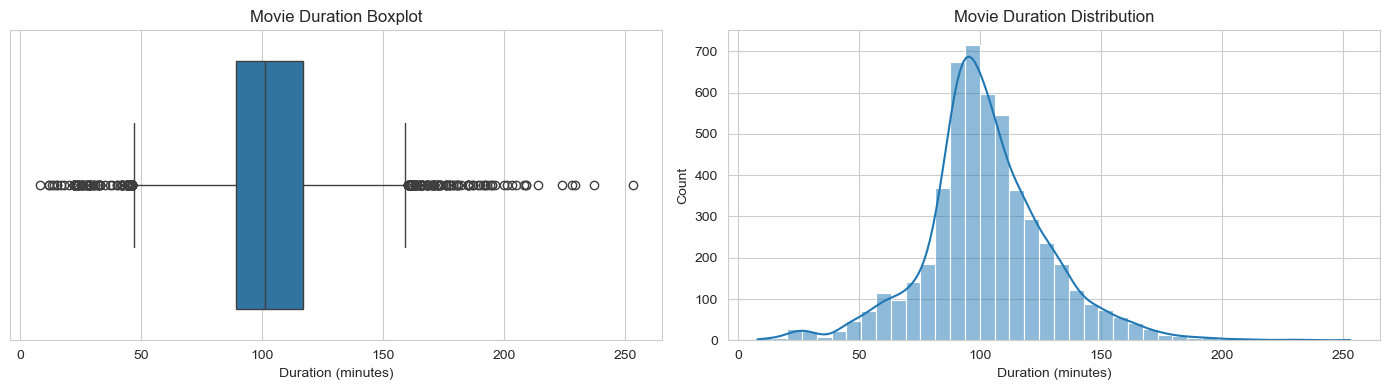

In [14]:
movies = df[df['type'] == 'Movie']

fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # 1 row, 2 columns

# Boxplot
sns.boxplot(x=movies['duration_minutes'], ax=axes[0])
axes[0].set_title('Movie Duration Boxplot')
axes[0].set_xlabel('Duration (minutes)')

# Histogram
sns.histplot(movies['duration_minutes'], bins=40, kde=True, ax=axes[1])
axes[1].set_title('Movie Duration Distribution')
axes[1].set_xlabel('Duration (minutes)')

plt.tight_layout()
plt.show()


#### We extracted numeric movie durations and used the IQR method to detect unusually short and unusually long movies. The boxplot and histogram visually confirmed that Netflix has many short films and several very long films, forming clear duration outliers.

## Calculate IQR for number of seasons in TV Shows and identify outliers.

In [15]:
# --- TV Show Season Outlier Detection (IQR Method) ---

# Filter only TV Shows
tv = df[df['type'] == 'TV Show']

Q1_tv = tv['seasons'].quantile(0.25)
Q3_tv = tv['seasons'].quantile(0.75)
IQR_tv = Q3_tv - Q1_tv

lower_tv = Q1_tv - 1.5 * IQR_tv
upper_tv = Q3_tv + 1.5 * IQR_tv

print("Q1 (TV):", Q1_tv)
print("Q3 (TV):", Q3_tv)
print("IQR (TV):", IQR_tv)
print("Lower Bound:", lower_tv)
print("Upper Bound:", upper_tv)

# Identify TV show outliers
tv_outliers = tv[
    (tv['seasons'] < lower_tv) | 
    (tv['seasons'] > upper_tv)
]

print("\nNumber of TV Show Outliers:", len(tv_outliers))
tv_outliers[['title','duration','seasons']].head(10)


Q1 (TV): 1.0
Q3 (TV): 2.0
IQR (TV): 1.0
Lower Bound: -0.5
Upper Bound: 3.5

Number of TV Show Outliers: 20


,title,duration,seasons
8,The Great British Baking Show,9 Seasons,9.0
380,The Flash,7 Seasons,7.0
676,Riverdale,4 Seasons,4.0
1173,Men on a Mission,6 Seasons,6.0
1419,Last Tango in Halifax,4 Seasons,4.0
1998,Call the Midwife,9 Seasons,9.0
2405,DC's Legends of Tomorrow,5 Seasons,5.0
2423,Supernatural,15 Seasons,15.0
2470,Supergirl,5 Seasons,5.0
2846,Velvet,4 Seasons,4.0


#### TV shows usually have 1–3 seasons, so anything above 3.5 seasons is an outlier. Your dataset shows 20 outliers, mostly long-running series like Supernatural (15 seasons) and The Great British Baking Show (9 seasons).

### Plot a boxplot and histogram of TV show seasons to visually confirm outliers.

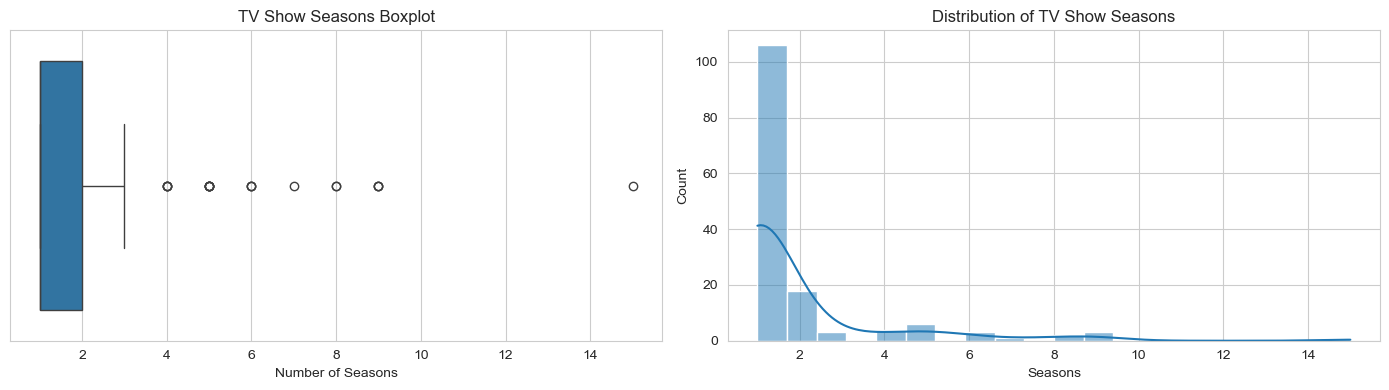

In [16]:
tv = df[df['type'] == 'TV Show']

fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # 1 row, 2 columns

# Boxplot
sns.boxplot(x=tv['seasons'], ax=axes[0])
axes[0].set_title('TV Show Seasons Boxplot')
axes[0].set_xlabel('Number of Seasons')

# Histogram
sns.histplot(tv['seasons'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of TV Show Seasons')
axes[1].set_xlabel('Seasons')

plt.tight_layout()
plt.show()

### Movie Duration Outliers:
 #### We calculated the interquartile range (IQR) for movie durations (Q1 = 89 min, Q3 = 117 min, IQR = 28 min). Using the standard formula, the lower bound is 47 min and the upper bound is 159 min. Movies with durations below 47 min or above 159 min are considered outliers. Examples include Jeans (166 min) and Once Upon a Time in America (229 min). In total, 249 movies are flagged as outliers.

### TV Show Seasons Outliers:
#### For TV shows, we considered the number of seasons. Q1 = 1, Q3 = 2, IQR = 1. Lower bound = -0.5, upper bound = 3.5. Any show with fewer than 0.5 or more than 3.5 seasons is considered an outlier. Examples include Supernatural (15 seasons) and The Great British Baking Show (9 seasons). 20 TV shows are identified as outliers.

### Summary:
####  Outlier detection helps us understand extreme cases in Netflix content: unusually long movies or TV shows with very high season counts. This insight will guide us during EDA and visualization, so we can either highlight or handle these extreme values appropriately.

## 🟨 C: CONSTRUCT (EDA Plan)

### 1. Movies vs TV Shows


### 2. Genre Distribution


### 3. Country Contribution


### 4. Content Release Trend


### 5. Rating Distribution


### 6. Duration Distribution

---


## Step 1:Movies vs TV Shows

**Objective:** Measure whether Netflix hosts more Movies or TV Shows.



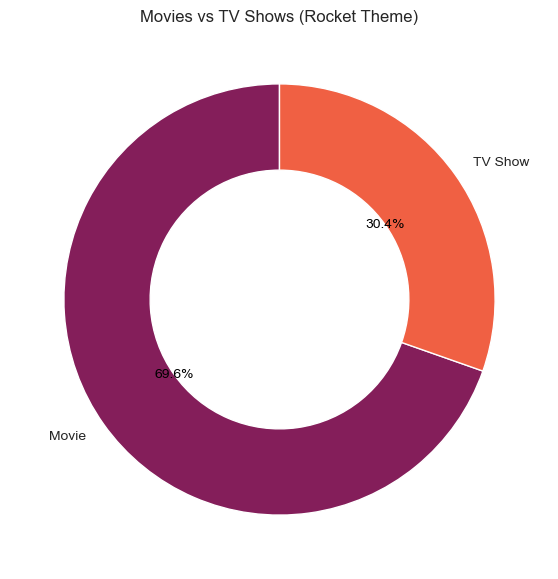

In [42]:


# ==== Donut Chart (Rocket Palette Theme) ====
type_counts = df['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

# 1. Get the colors from the 'rocket' palette (we only need 2 colors)
# The colors will be a dark red/pink and a light red/pink
rocket_colors = sns.color_palette('rocket', n_colors=2)

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=rocket_colors, # <-- APPLYING THE ROCKET GRADIENT COLORS
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width':0.4}
)

# Optional: Adjust autotext color for readability, especially if the colors are dark
# Since 'rocket' starts dark, let's make the percentage text white for better contrast
for autotext in autotexts:
    autotext.set_color('black')

plt.title("Movies vs TV Shows (Rocket Theme)")
plt.savefig("movies_vs_tv_rocket_theme.png", dpi=300, bbox_inches='tight')
plt.show()

#### The analysis of the provided dataset confirms that Movies are the dominant content type, but not overwhelmingly so. The library is structured with approximately $70\%$ Movies and a significant $30\%$ TV Shows.

## Step 2:Genre / Category Distribution

**Objective :** Identify which genres/categories Netflix releases the most.




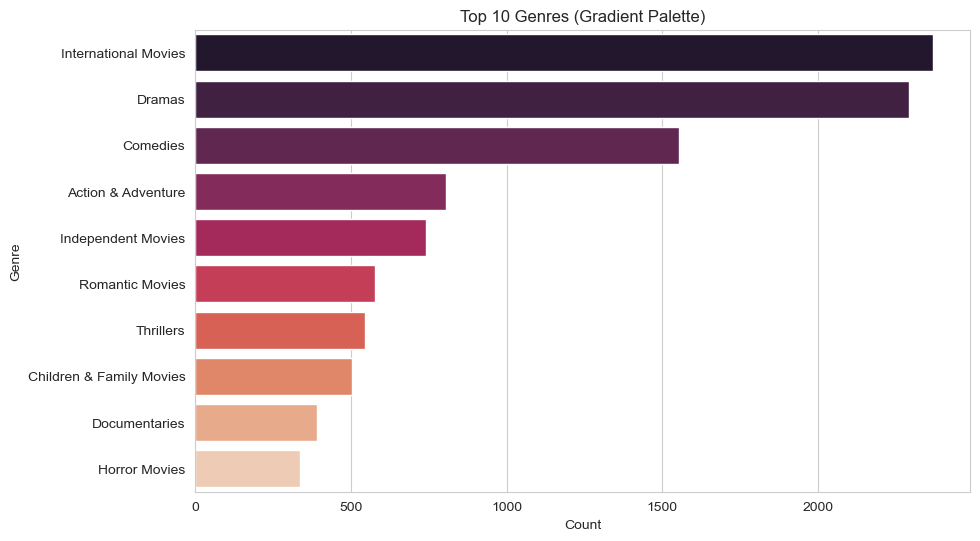

In [31]:
# ==== Genre Bar Chart (Future-Proof Gradient) ====
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10,6))

# ✅ Fix for FutureWarning:
# 1. Assign the y-variable (genres.index) to 'hue'.
# 2. Set 'legend=False'.
sns.barplot(
    x=genres.values, 
    y=genres.index, 
    hue=genres.index,      # Use the index (Genre names) for color assignment
    palette='rocket',
    legend=False           # Suppress the redundant legend
)

plt.title("Top 10 Genres (Gradient Palette)")
plt.xlabel("Count")
plt.ylabel("Genre")

plt.savefig("top_genres_gradient_fixed.png", dpi=300, bbox_inches='tight')
plt.show()

#### The most frequently released genres are International Movies, Dramas, and Comedies. Action & Adventure, Independent Movies, and Romantic Movies also appear frequently, reflecting Netflix’s aim to cater to both global audiences and diverse tastes.

## Step 3:Country Contribution

**Objective:** Identify which countries contribute the most content to Netflix.




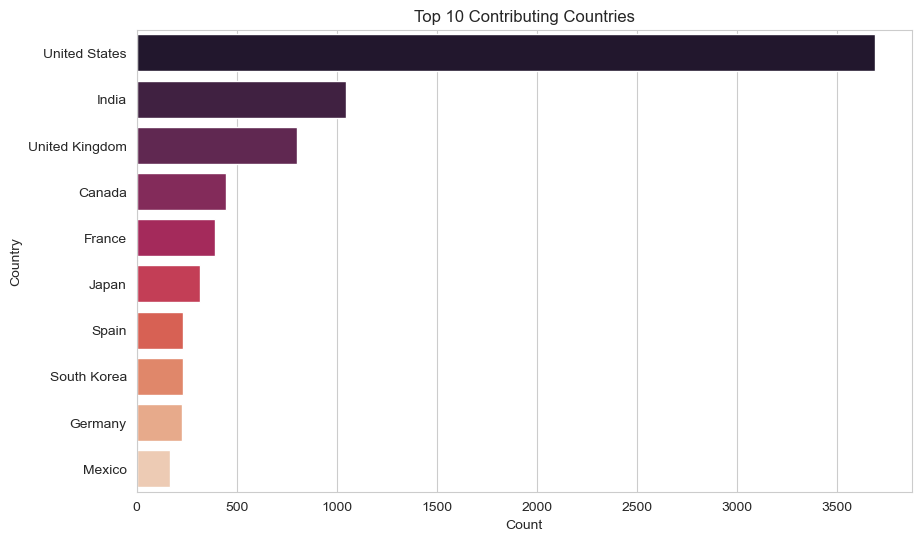

In [43]:
# ==== Country Bar Chart (Colorful & Future-Proof) ====
countries = df['country'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10,6))

# Applying the colorful 'rocket' palette with the future-proof syntax:
sns.barplot(
    x=countries.values, 
    y=countries.index,
    hue=countries.index,     # Assign 'Country' names to hue for color mapping
    palette='rocket',        # Use the dark-to-red gradient
    legend=False             # Suppress the legend
)

plt.title("Top 10 Contributing Countries")
plt.xlabel("Count")
plt.ylabel("Country")

plt.savefig("top_countries_colorful.png", dpi=300, bbox_inches='tight')
plt.show()

#### United States, India, and the United Kingdom produce the majority of Netflix content. This indicates both Hollywood dominance and Netflix’s strategy to expand regionally, providing localized content for large markets.

## Step 4:Content Release Trend Over Time

**Objective:** Understand how Netflix’s content production has changed over the years.




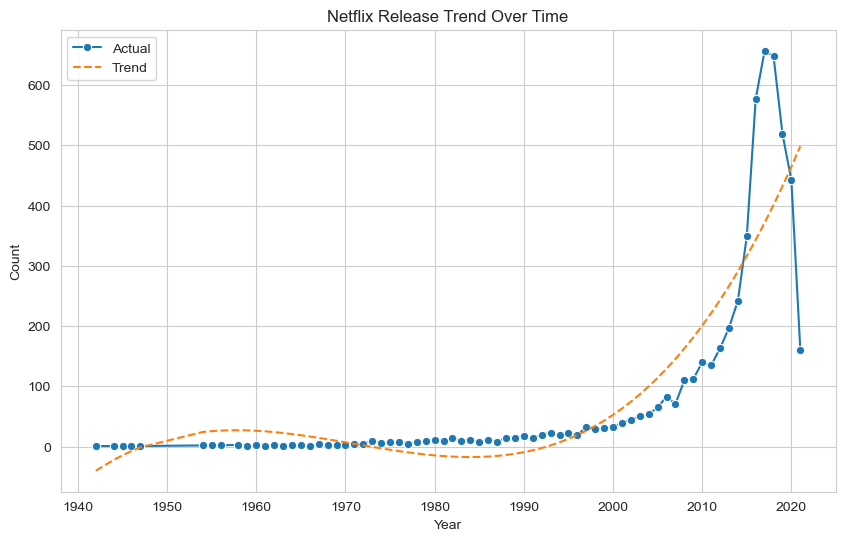

In [25]:
# ==== Release Trend ====
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", label="Actual")

# Trend Line (Polynomial)
z = np.polyfit(year_counts.index, year_counts.values, 3)
p = np.poly1d(z)
plt.plot(year_counts.index, p(year_counts.index), linestyle="--", label="Trend")

plt.title("Netflix Release Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()

plt.savefig("release_trend.png", dpi=300, bbox_inches='tight')
plt.show()


#### Content production has grown steadily since 2015, peaking around 2017–2018. This trend demonstrates Netflix’s rapid expansion and increasing investment in original and acquired content in recent years.

## Step 5:Rating Distribution

**Objective:** Understand which audience ratings (e.g., TV-MA, TV-14, PG) dominate Netflix content.




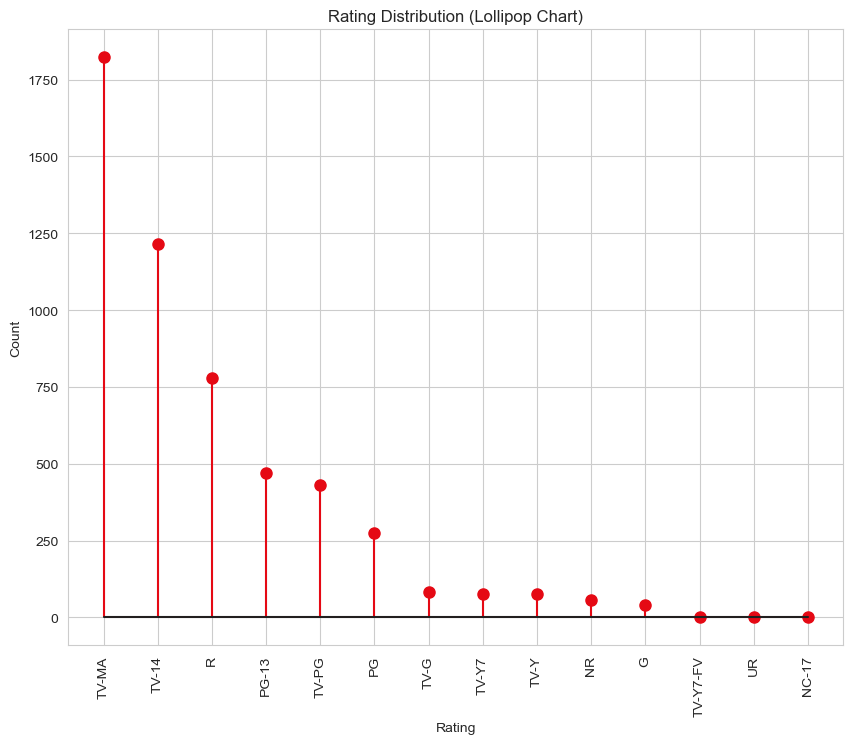

In [38]:
# ==== Rating Lollipop (Netflix Red Theme) ====
rating_counts = df['rating'].value_counts()

# Define the Netflix Red hex color
netflix_red = "#E50914" 

plt.figure(figsize=(10,8))

# 1. Capture the objects returned by plt.stem()
(markerline, stemlines, baseline) = plt.stem(rating_counts.values)

# 2. Set the color properties using plt.setp()
# Set the color of the stem lines
plt.setp(stemlines, color=netflix_red)
# Set the color of the markers (and ensure it's a circle 'o' for the lollipop head)
plt.setp(markerline, color=netflix_red, marker='o', markersize=8)
# Optional: Set the base line color to dark grey/black
plt.setp(baseline, color='#221F1F')

plt.xticks(range(len(rating_counts)), rating_counts.index, rotation=90)
plt.title("Rating Distribution (Lollipop Chart)")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.savefig("rating_lollipop_themed.png", dpi=300, bbox_inches='tight')
plt.show()

#### Most titles are targeted at adult and teen audiences (TV-MA, TV-14, R). Family-friendly content and children’s programs exist but represent a smaller fraction of the library.

## Step 6:Movie Duration Distribution

**Objective:** To understand how long Netflix movies usually are, identify common duration ranges, and spot unusually short or long movies.




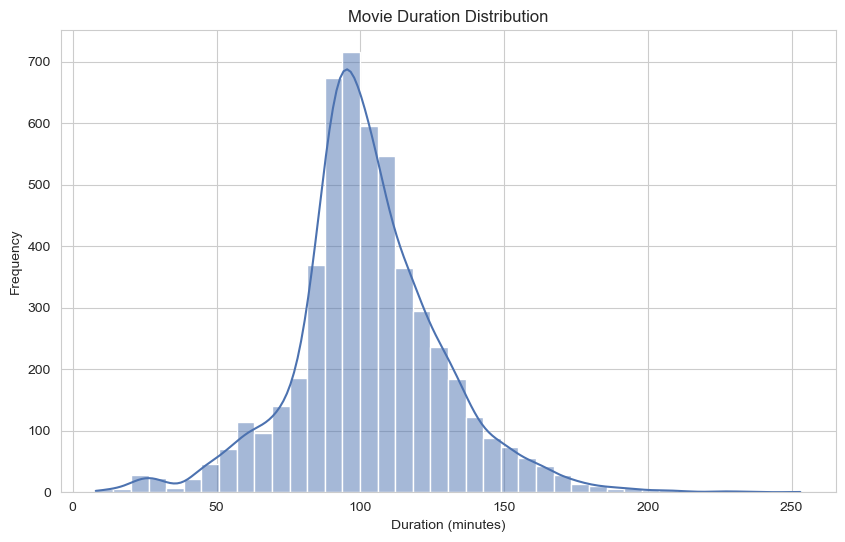

In [40]:
# ==== Duration Histogram (Clean Teal Theme) ====
movies = df[df['type']=="Movie"]

# Use a clean, universally appealing color, like Teal (standard seaborn color)
teal_color = "#4c72b0" 

plt.figure(figsize=(10,6))
sns.histplot(
    movies['duration_minutes'], 
    bins=40, 
    kde=True,
    color=teal_color,            # Fill color of the bars
    edgecolor='white',           # White edge color for clean bar definition
    line_kws={'color': 'black'}  # Set the KDE line to black for contrast
)

plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

plt.savefig("movie_duration_teal_theme.png", dpi=300, bbox_inches='tight')
plt.show()

#### Most movies have a runtime between 90–120 minutes, which is the typical length preferred by audiences. There are a few outliers with extremely short or very long durations, but these are exceptions rather than the norm.

## 🟩 E: EXECUTE (Insights Summary)





---

## Key Insights

| Area | Strategic Finding | Details & Context |
|------|-----------------|-----------------|
| **Content Portfolio** | Balanced Focus on Movies and TV Shows | The catalog is split approximately **70% Movies** and **30% TV Shows**. While movies dominate, TV shows constitute a critical third of the library, confirming their importance for ongoing viewer engagement and retention, not just passive viewing. |
| **Global Strategy** | Hybrid of Hollywood Dominance and Regional Growth | Production is heavily concentrated in the **United States, India, and the United Kingdom**. This validates a dual-pronged strategy: leveraging global appeal via US-led content while fueling subscriber growth through high-volume, culturally relevant content from key regional markets. |
| **Genre Drivers** | Prioritization of Broad, International Appeal | The top three genres are **International Movies, Dramas, and Comedies**. This mix reflects an operational need to deliver high-volume content that transcends language and cultural barriers, ensuring wide user adoption globally. |
| **Growth Trajectory** | Rapid Expansion Followed by Stabilization | Content addition grew aggressively from **2015**, peaking in **2019** before stabilizing in recent years. This signals a transition from a massive acquisition phase to a more mature, focused investment strategy. |
| **Audience Focus** | Content is Overwhelmingly Geared Toward Mature Audiences | The library is heavily weighted toward **adult and older teen audiences (TV-MA, TV-14, R)**, suggesting the core value proposition targets a mature, independent viewer base. |
| **Movie Standardization** | Adherence to Industry Standard Movie Duration | Most movies fall within the conventional runtime of **90 to 120 minutes**, aligning with standard audience expectations and consumption habits. |

---

## Final Strategic Recommendations

Based on the content analysis, the following action points are recommended to **maximize market opportunity and content efficiency**:

1. **Sustain Regional Investment**  
   Continue to strategically resource content creation in high-volume regions like **India** and the **UK**. This localized investment drives global subscriber diversification.

2. **Optimize TV Show Pipeline**  
   Given the **30% share of TV Shows** is crucial for recurring engagement, dedicate resources to expanding serialized content, particularly in **high-performing international genres**.

3. **Evaluate Portfolio Gaps**  
   While the adult/teen market is saturated, conduct a targeted analysis to determine the value of increasing production in **underserved segments** (e.g., family, children’s content) to broaden the subscriber funnel.

4. **Leverage Duration Insights**  
   Use the confirmed **90-120 minute standard** as a benchmark for efficiency, but strategically experiment with **non-standard durations** for niche content (e.g., documentaries) to capture specialized audiences.
